# Required libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Understanding the data



In [44]:
df = pd.read_csv('/content/ADNI_Dataset.csv', index_col=0)

In [45]:
df.shape

(7426, 53)

In [46]:
df.head()

,file,matcher,PTID,RID,VISCODE,LONIUID_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,LONIUID_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,EXAMDATE,EXAMDATE_bl,EXAMDATE_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,EXAMDATE_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,CURRENT_DIAGNOSE,DX,DX_bl,DXCHANGE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,CDRSB_bl,CDRSB,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,FAQ_bl,FAQ,MOCA,Ventricles_bl,Ventricles,Hippocampus_bl,Hippocampus,WholeBrain_bl,WholeBrain,Entorhinal_bl,Entorhinal,Fusiform_bl,Fusiform,MidTemp_bl,MidTemp
0,002_S_0295___2006-04-18___S13408.nii,_SerieIdMatcher,002_S_0295,295.0,bl,13408,13408,2006-05-09,2006-05-09,2006-04-18,2006-04-18,0.0,NL,CN,1.0,84.8,Male,18.0,Not Hisp/Latino,White,Married,1.0,0.0,0.0,3.0,3.00,4.0,4.00,28.0,28.0,56.0,56.0,5.0,5.0,3.0,3.0,23.0769,23.0769,0.0,0.0,NaN,39130.0,39130.0,7068.0,7068.0,1076350.0,1076350.0,3619.0,3619.0,16561.0,16561.0,19829.0,19829.0
1,002_S_0295___2006-11-02___S21856.nii,_SerieIdMatcher,002_S_0295,295.0,m06,21856,21856,2006-11-02,2006-05-09,2006-11-02,2006-11-02,0.0,NL,CN,1.0,84.8,Male,18.0,Not Hisp/Latino,White,Married,1.0,0.0,0.0,3.0,5.33,4.0,6.33,28.0,28.0,56.0,50.0,5.0,7.0,3.0,2.0,23.0769,16.6667,0.0,0.0,NaN,39130.0,39101.0,7068.0,6896.0,1076350.0,1089680.0,3619.0,3662.0,16561.0,18041.0,19829.0,19825.0
2,002_S_0295___2007-05-25___S32678.nii,_SerieIdMatcher,002_S_0295,295.0,m12,32678,32678,2007-05-25,2006-05-09,2007-05-25,2007-05-25,0.0,NL,CN,1.0,84.8,Male,18.0,Not Hisp/Latino,White,Married,1.0,0.0,0.0,3.0,4.67,4.0,5.67,28.0,30.0,56.0,53.0,5.0,10.0,3.0,2.0,23.0769,14.2857,0.0,0.0,NaN,39130.0,40554.0,7068.0,6894.0,1076350.0,1085210.0,3619.0,3572.0,16561.0,17386.0,19829.0,19917.0
3,002_S_0295___2008-07-23___S54061.nii,_SerieIdMatcher,002_S_0295,295.0,m24,54061,54061,2008-08-04,2006-05-09,2008-07-23,2008-07-23,0.0,NL,CN,1.0,84.8,Male,18.0,Not Hisp/Latino,White,Married,1.0,0.0,0.0,3.0,3.67,4.0,5.67,28.0,29.0,56.0,45.0,5.0,7.0,3.0,2.0,23.0769,16.6667,0.0,0.0,NaN,39130.0,42423.0,7068.0,6839.0,1076350.0,1067480.0,3619.0,3855.0,16561.0,18159.0,19829.0,19269.0
4,002_S_0295___2009-05-22___S67612.nii,_SerieIdMatcher,002_S_0295,295.0,m36,67612,67612,2009-05-07,2006-05-09,2009-05-22,2009-05-22,0.0,NL,CN,1.0,84.8,Male,18.0,Not Hisp/Latino,White,Married,1.0,0.0,0.0,3.0,3.67,4.0,6.67,28.0,28.0,56.0,43.0,5.0,5.0,3.0,2.0,23.0769,22.2222,0.0,0.0,NaN,39130.0,43862.0,7068.0,6674.0,1076350.0,1053480.0,3619.0,3620.0,16561.0,17964.0,19829.0,19482.0


In [47]:
df = df.drop(columns=[col for col in ['file',
                                     'matcher',
                                     'PTID',
                                     'LONIUID_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16',
                                     'LONIUID_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
                                     'EXAMDATE',
                                     'EXAMDATE_bl',
                                     'EXAMDATE_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16',
                                     'EXAMDATE_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
                                     'CDRSB',
                                     'ADAS11',
                                     'ADAS13',
                                     'MMSE',
                                     'RAVLT_immediate',
                                     'RAVLT_learning',
                                     'RAVLT_forgetting',
                                     'RAVLT_perc_forgetting',
                                     'FAQ',
                                     'Ventricles',
                                     'Hippocampus',
                                     'WholeBrain',
                                     'Entorhinal',
                                     'Fusiform',
                                     'MidTemp',
                                     'MOCA',
                                     'PTGENDER',
                                     'PTEDUCAT',
                                     'PTETHCAT',
                                     'PTRACCAT',
                                     'PTMARRY'
                                     ]
                      if col in df.columns])

In [48]:
df.sample(5)

,RID,VISCODE,CURRENT_DIAGNOSE,DX,DX_bl,DXCHANGE,AGE,APOE4,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,FAQ_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl
4976,2191.0,m36,1.0,MCI,EMCI,2.0,66.7,0.0,0.5,6.00,8.00,30.0,55.0,5.0,2.0,15.3846,0.0,17897.0,7962.0,1172280.0,4620.0,22679.0,22502.0
7294,4159.0,m24,1.0,MCI,EMCI,2.0,71.0,0.0,1.0,10.00,16.00,30.0,49.0,10.0,3.0,21.4286,0.0,29515.0,6659.0,1044320.0,3450.0,19814.0,19626.0
4536,1185.0,bl,2.0,Dementia,AD,3.0,62.0,1.0,6.0,26.67,40.67,20.0,19.0,1.0,4.0,100.0000,22.0,40061.0,5549.0,929514.0,2814.0,11646.0,15517.0
82,954.0,m06,1.0,MCI,LMCI,2.0,69.3,1.0,2.0,10.67,21.67,25.0,24.0,0.0,4.0,100.0000,1.0,10739.0,5511.0,805318.0,2851.0,12839.0,15165.0
96,1018.0,m12,2.0,Dementia,AD,3.0,70.7,0.0,3.0,9.00,17.00,26.0,28.0,1.0,5.0,100.0000,7.0,20854.0,7142.0,1019460.0,3614.0,16428.0,17975.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7426 entries, 0 to 7425
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RID                       7161 non-null   float64
 1   VISCODE                   7161 non-null   object 
 2   CURRENT_DIAGNOSE          7161 non-null   float64
 3   DX                        6580 non-null   object 
 4   DX_bl                     7161 non-null   object 
 5   DXCHANGE                  6575 non-null   float64
 6   AGE                       7161 non-null   float64
 7   APOE4                     7153 non-null   float64
 8   CDRSB_bl                  7161 non-null   float64
 9   ADAS11_bl                 7150 non-null   float64
 10  ADAS13_bl                 7125 non-null   float64
 11  MMSE_bl                   7161 non-null   float64
 12  RAVLT_immediate_bl        7139 non-null   float64
 13  RAVLT_learning_bl         7139 non-null   float64
 14  RAVLT_forgett

In [50]:
bl_df = df[df['VISCODE']=='bl'].copy()

In [51]:
bl_df.shape

(1540, 23)

In [52]:
print('Duplicates based on RID: ', bl_df.duplicated(subset=['RID']).sum())

Duplicates based on RID:  179


In [53]:
bl_df = bl_df.drop_duplicates(subset='RID', keep= 'first')

In [54]:
print('Duplicates based on RID: ', bl_df.duplicated(subset=['RID']).sum())

Duplicates based on RID:  0


In [55]:
bl_df.shape

(1361, 23)

In [56]:
bl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1361 entries, 0 to 7423
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RID                       1361 non-null   float64
 1   VISCODE                   1361 non-null   object 
 2   CURRENT_DIAGNOSE          1361 non-null   float64
 3   DX                        1357 non-null   object 
 4   DX_bl                     1361 non-null   object 
 5   DXCHANGE                  1357 non-null   float64
 6   AGE                       1361 non-null   float64
 7   APOE4                     1353 non-null   float64
 8   CDRSB_bl                  1361 non-null   float64
 9   ADAS11_bl                 1357 non-null   float64
 10  ADAS13_bl                 1351 non-null   float64
 11  MMSE_bl                   1361 non-null   float64
 12  RAVLT_immediate_bl        1355 non-null   float64
 13  RAVLT_learning_bl         1355 non-null   float64
 14  RAVLT_forgett

In [57]:
bl_df.isnull().sum()

,0
RID,0
VISCODE,0
CURRENT_DIAGNOSE,0
DX,4
DX_bl,0
DXCHANGE,4
AGE,0
APOE4,8
CDRSB_bl,0
ADAS11_bl,4


In [58]:
bl_df.describe()   # mathematical summary

,RID,CURRENT_DIAGNOSE,DXCHANGE,AGE,APOE4,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,FAQ_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl
count,1361.000000,1361.000000,1357.000000,1361.000000,1353.000000,1361.000000,1357.000000,1351.000000,1361.000000,1355.000000,1355.000000,1355.000000,1351.000000,1353.000000,1318.000000,1176.000000,1.340000e+03,1167.000000,1167.000000,1167.000000
mean,2404.889052,0.892726,1.910096,73.774063,0.570584,1.625276,10.753088,16.889415,27.188832,35.221402,4.176384,4.356458,58.881716,4.146341,40303.749621,6748.788265,1.015938e+06,3457.047986,17150.475578,19282.580120
std,1903.966344,0.695753,0.728189,7.290822,0.675824,1.762850,6.528469,9.477132,2.678684,12.343543,2.771298,2.458343,34.553481,6.120887,22468.094860,1200.605594,1.131623e+05,782.564785,2760.968427,3099.208831
min,2.000000,-1.000000,1.000000,54.400000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-4.000000,-5.000000,-100.000000,0.000000,5650.000000,2991.000000,6.693640e+05,1426.000000,8991.000000,9375.000000
25%,686.000000,0.000000,1.000000,69.200000,0.000000,0.000000,6.000000,9.670000,26.000000,26.000000,2.000000,3.000000,30.000000,0.000000,23512.500000,5894.500000,9.348925e+05,2912.500000,15309.000000,17282.500000
50%,1343.000000,1.000000,2.000000,74.000000,0.000000,1.000000,9.330000,15.000000,28.000000,34.000000,4.000000,4.000000,60.000000,1.000000,35645.500000,6831.500000,1.010680e+06,3480.000000,17179.000000,19238.000000
75%,4428.000000,1.000000,2.000000,79.000000,1.000000,2.500000,14.000000,22.670000,29.000000,44.000000,6.000000,6.000000,100.000000,6.000000,52016.250000,7640.000000,1.092112e+06,4016.000000,18954.000000,21353.500000
max,5296.000000,2.000000,8.000000,91.400000,2.000000,10.000000,42.670000,54.670000,30.000000,71.000000,12.000000,13.000000,100.000000,27.000000,140133.000000,10602.000000,1.486040e+06,5896.000000,29950.000000,32189.000000


# Understand distribution of MMSE, imaging, demographics

In [59]:
missing_values = bl_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(bl_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])


                          Missing Count  Missing %
Fusiform_bl                         194  14.254225
Entorhinal_bl                       194  14.254225
MidTemp_bl                          194  14.254225
Hippocampus_bl                      185  13.592946
Ventricles_bl                        43   3.159442
WholeBrain_bl                        21   1.542983
ADAS13_bl                            10   0.734754
RAVLT_perc_forgetting_bl             10   0.734754
APOE4                                 8   0.587803
FAQ_bl                                8   0.587803
RAVLT_immediate_bl                    6   0.440852
RAVLT_forgetting_bl                   6   0.440852
RAVLT_learning_bl                     6   0.440852
DX                                    4   0.293902
DXCHANGE                              4   0.293902
ADAS11_bl                             4   0.293902


<Figure size 640x480 with 0 Axes>

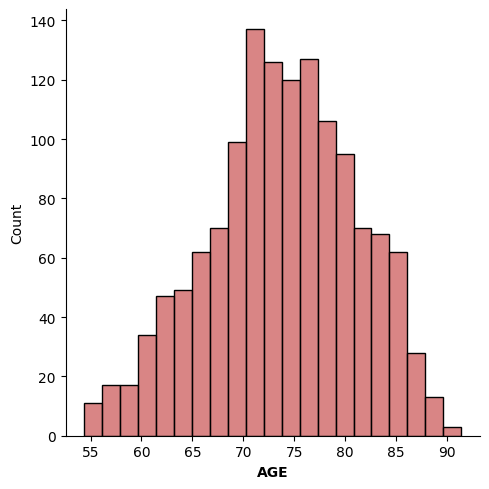

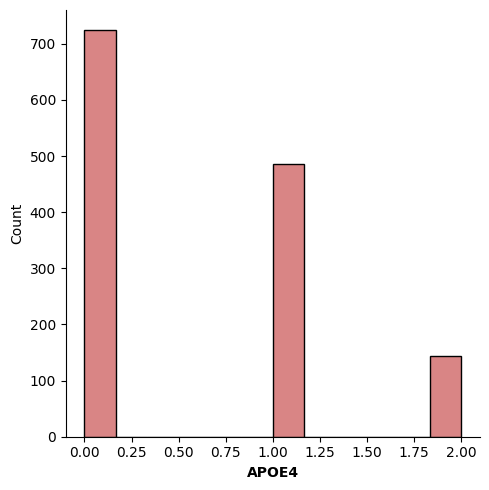

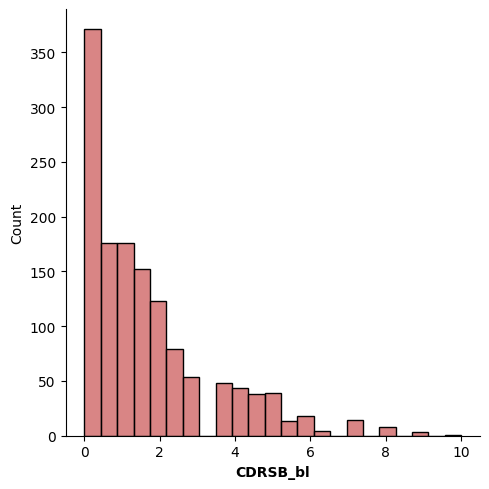

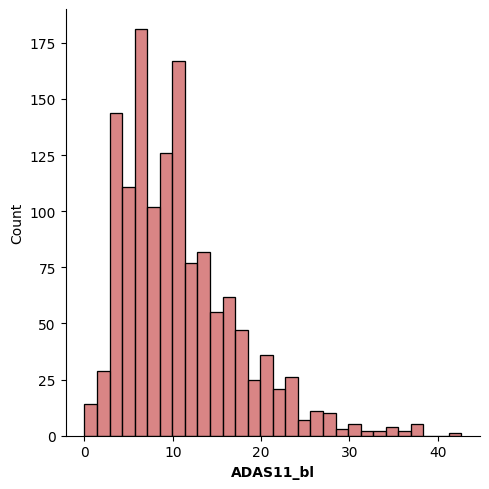

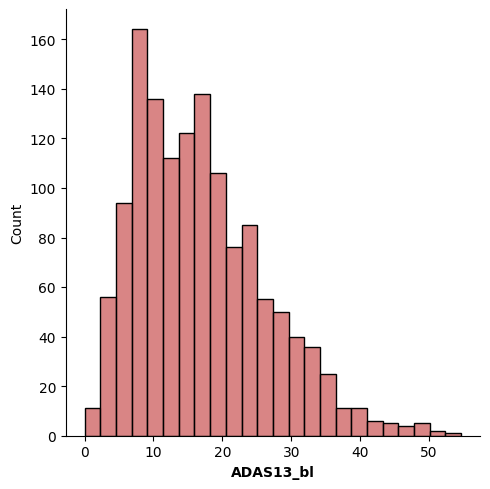

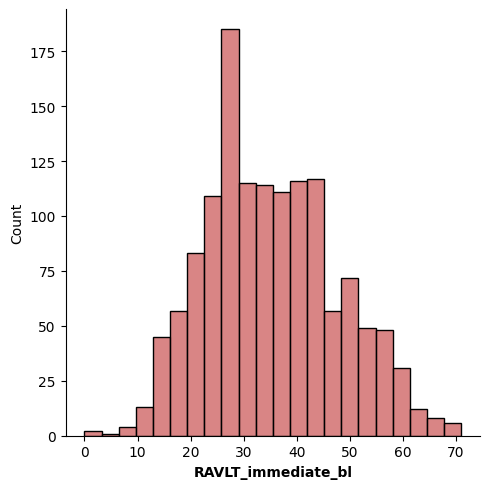

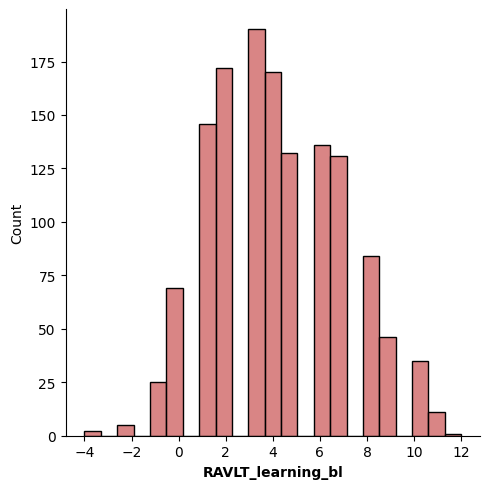

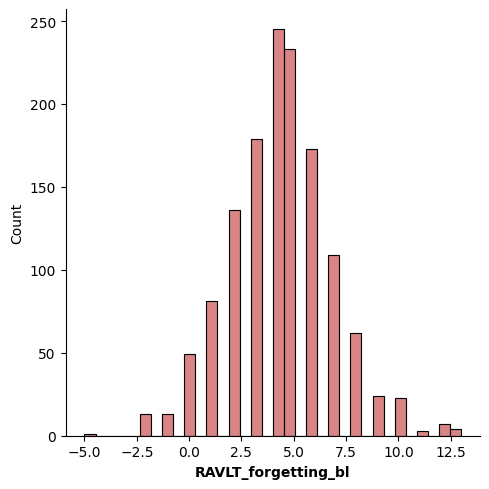

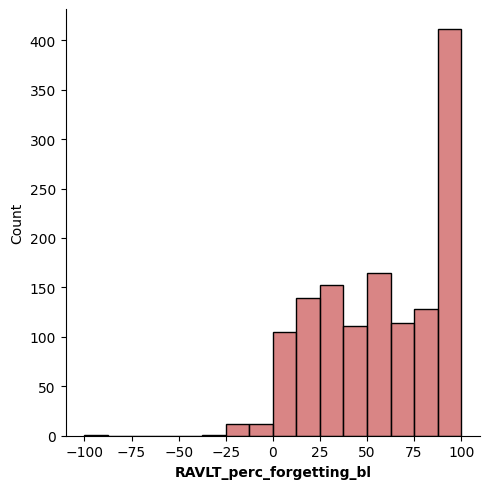

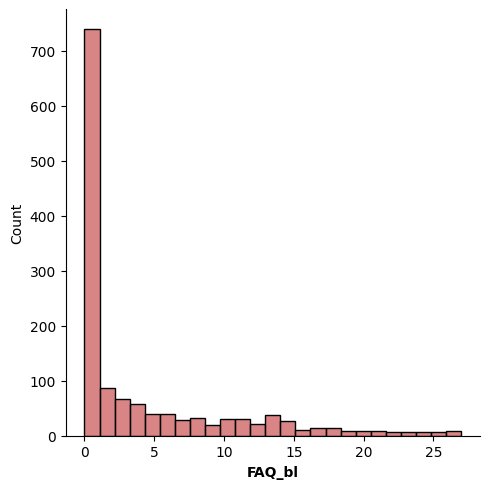

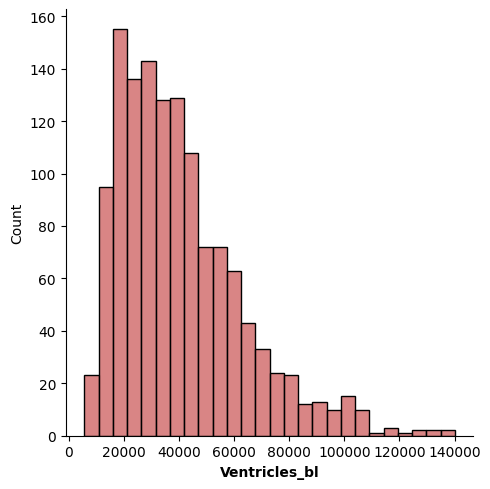

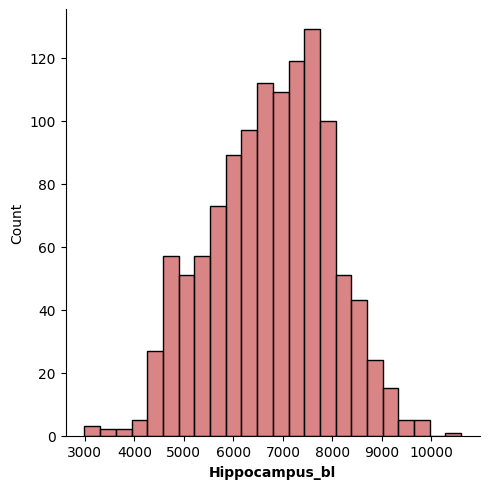

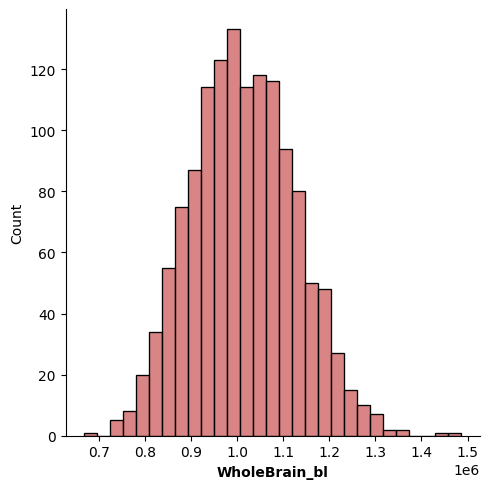

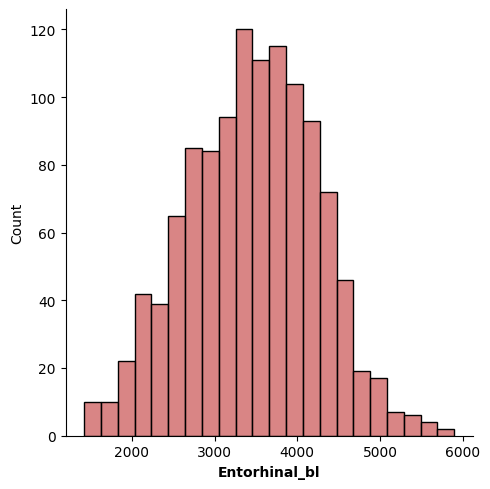

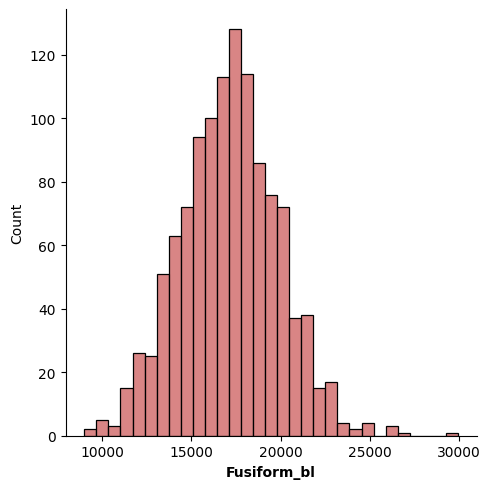

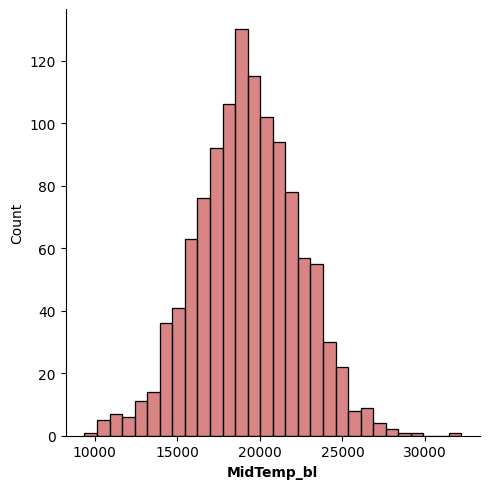

In [60]:
features = ['AGE','APOE4','CDRSB_bl','ADAS11_bl', 'ADAS13_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
                 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'FAQ_bl','Ventricles_bl','Hippocampus_bl',
            'WholeBrain_bl','Entorhinal_bl','Fusiform_bl','MidTemp_bl']

plt.figure()
for i, col in enumerate(features):
  sns.displot(x=bl_df[col], color='indianred')
  plt.xlabel(col,weight='bold')
  plt.show()

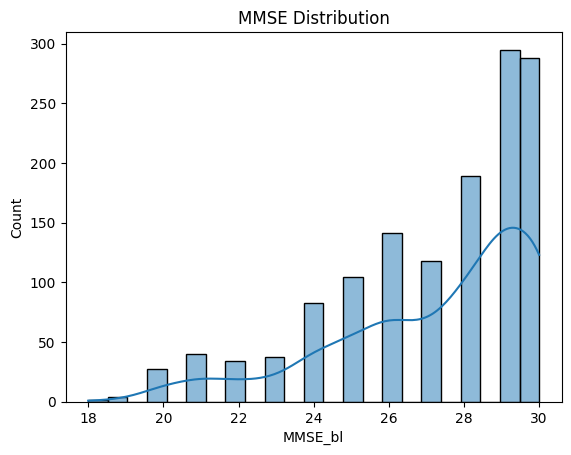

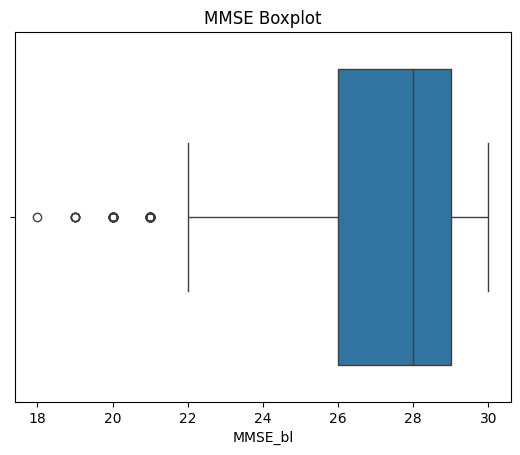

In [61]:
sns.histplot(bl_df['MMSE_bl'], kde=True)
plt.title("MMSE Distribution")
plt.show()

sns.boxplot(x=bl_df['MMSE_bl'])
plt.title("MMSE Boxplot")
plt.show()

# Preprocessing pipelines

In [62]:
df_model = bl_df.drop(columns=['RID', 'VISCODE', 'DX', 'DX_bl', 'DXCHANGE', 'CURRENT_DIAGNOSE'])  # droping mon model columns

In [63]:
df_model.shape

(1361, 17)

In [64]:
df_model.sample(5)

,AGE,APOE4,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,FAQ_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl
822,74.2,1.0,0.0,4.00,8.00,30.0,57.0,6.0,2.0,15.3846,0.0,12545.0,7310.0,1018970.0,3344.0,17629.0,17881.0
857,63.2,1.0,0.0,8.67,13.67,29.0,29.0,5.0,2.0,25.0000,0.0,5834.0,6410.0,886395.0,2789.0,16107.0,16845.0
6293,65.6,1.0,1.5,7.00,11.00,28.0,49.0,7.0,7.0,50.0000,4.0,12584.0,7745.0,1060330.0,4441.0,18306.0,18572.0
385,84.6,0.0,0.0,5.33,7.33,30.0,24.0,6.0,7.0,87.5000,0.0,35471.0,NaN,1028340.0,NaN,NaN,NaN
5555,67.5,0.0,0.0,3.00,5.00,30.0,42.0,7.0,2.0,20.0000,0.0,33185.0,8297.0,1165500.0,4946.0,20147.0,21194.0


In [65]:
df_model.isnull().sum()

,0
AGE,0
APOE4,8
CDRSB_bl,0
ADAS11_bl,4
ADAS13_bl,10
MMSE_bl,0
RAVLT_immediate_bl,6
RAVLT_learning_bl,6
RAVLT_forgetting_bl,6
RAVLT_perc_forgetting_bl,10


In [66]:
# Features and target

categorical_cols = ['APOE4']
clinical_cols = ['CDRSB_bl','ADAS11_bl', 'ADAS13_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
                 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'FAQ_bl']
imaging_cols = ['Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl',
                'Entorhinal_bl', 'Fusiform_bl', 'MidTemp_bl']
age_col = ['AGE']


target_col = 'MMSE_bl'

In [67]:
# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Clinical scores pipeline
clinical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Imaging biomarkers pipeline
imaging_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

# Age pipeline
age_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_pipeline, categorical_cols),
    ('clinical', clinical_pipeline, clinical_cols),
    ('imaging', imaging_pipeline, imaging_cols),
    ('age', age_pipeline, age_col)
])

# Default models in a dictionary

In [68]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(random_state=42)
}

In [69]:
# Hyperparameters
param_grids = {
    "Ridge Regression": {
        'model__alpha': [0.001, 0.01, 0.1, 1.0,10],
        'model__max_iter': [1000, 5000]
    },
    "Lasso Regression": {
        'model__alpha': [0.001, 0.01, 0.1, 1.0],
        'model__max_iter': [1000, 5000, 10000]
    },
    "Random Forest": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 5, 10, 20]
    },
    "Gradient Boosting": {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'model__max_depth': [3, 5, 7, 10]
    },
    "Support Vector Regressor": {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__kernel': ['rbf', 'linear'],
        'model__gamma': ['scale', 'auto', 0.01, 0.1, 1]
    },
    "XGBoost": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 7, 10],
        'model__learning_rate': [0.01, 0.05, 0.1, 0.2]
    },
    "Linear Regression": {}
}

# Functions for model training and evalutaion

In [70]:
def evaluate_clf(true, predicted):

    R2 = r2_score(true, predicted)
    RMSE = np.sqrt(mean_squared_error(true, predicted))
    MAE = mean_absolute_error(true, predicted)
    return R2,RMSE,MAE


In [71]:
# function to evaluate the models and return a report

def evaluate_models(X,Y, models):
  '''
  this functions takes X ,Y and model dictionary
  train test spilt
  returns dataframe which contains report of all model metrics

  '''
  # separate dataset into trian and test

  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


  results = []

  # Loop through models
  for name, model in models.items():
      print(f"tuning {name}...")

      pipe = Pipeline(steps=[('model', model)])
      param_grid = param_grids[name]

      if param_grid:
          grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
      else:
          grid = model  # For Linear Regression with no hyperparameters

      if param_grid:
          grid.fit(X_train, Y_train)
          best_model = grid.best_estimator_
          best_params = grid.best_params_
      else:
          grid.fit(X_train, Y_train)
          best_model = grid
          best_params = "Default"

      # Predictions
      Y_pred = best_model.predict(X_test)
      r2, rmse, mae = evaluate_clf(Y_test, Y_pred)

      results.append({
          'Model': name,
          'Best Params': best_params,
          'R2': r2,
          'RMSE': rmse,
          'MAE': mae
      })
  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_colwidth', None)
  pd.set_option('display.width', 1000)
  report_df = pd.DataFrame(results)
  print("\n Final Model Performance:\n")
  print(report_df.sort_values(by='R2', ascending=False).reset_index(drop=True))

In [72]:
x = df_model.drop(columns=[target_col])
y = df_model[target_col]

In [73]:
# Train model
X = preprocessor.fit_transform(x)

# Predict and evaluate
report = evaluate_models(X,y,models)

tuning Linear Regression...
tuning Ridge Regression...
tuning Lasso Regression...
tuning Random Forest...
tuning Gradient Boosting...
tuning Support Vector Regressor...
tuning XGBoost...

 Final Model Performance:

                      Model                                                                       Best Params        R2      RMSE       MAE
0          Ridge Regression                                     {'model__alpha': 10, 'model__max_iter': 1000}  0.670338  1.565495  1.224231
1          Lasso Regression                                   {'model__alpha': 0.01, 'model__max_iter': 1000}  0.669459  1.567582  1.224038
2         Linear Regression                                                                           Default  0.668934  1.568825  1.225875
3  Support Vector Regressor                     {'model__C': 1, 'model__gamma': 0.01, 'model__kernel': 'rbf'}  0.665152  1.577761  1.226553
4             Random Forest                                {'model__max_depth': 5, 'm